# UAS MACHINE LEARNING 1

Arieldhipta Tarliman - 2702234636

# Predict Obesity Level of Screened Individual

This project is important because it leverages machine learning to identify obesity risks early, enabling timely interventions, improving public health outcomes, and potentially reducing healthcare costs associated with obesity-related diseases.

# Dataset

- Gender: gender of the individual
- Birth Date: the birth date of the individual
- Height: the individual’s height (m)
- Weight: the individual's weight (kg)
- family_history_with_overweight: whether the individual has one or more family members who are
overweight
- High Calorie Meal Freq: whether the individual often consumes high-calorie meals
- Veggies in Meals freq: the number of times vegetables are consumed in meals daily
- Daily Main Meals: the number of main meals per day
- Snack Frequency: the frequency of snack times taken by the individual daily
- Smoking: whether the individual smokes or not (yes/no)
- Daily Water Consumption: the amount of water consumed daily (L)
- Weekly Physical Activity: the average number of physical activities per week
- Alcohol: frequency of alcohol consumption
- Transportation: most frequently used means of transportation
- Obesity level: the individual’s obesity severity

# Import Library

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

import logging
logging.basicConfig(filename='warnings.log', level=logging.WARNING)
logging.captureWarnings(True) 


# Read Dataset

In [50]:
df = pd.read_csv('1B.tsv', sep='\t')

## Simple EDA

In [51]:
df

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
0,Female,2003/02/05,1.620000,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,0.000000,no,Public_Transportation,Normal_Weight
1,Female,2003/06/13,1.520000,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,3.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,2001/06/25,1.800000,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,2.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,1997/08/14,1.800000,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,2.000000,Frequently,Walking,Overweight_Level_I
4,Male,2002/05/14,1.780000,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,2003/11/15,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,1.676269,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,2002/08/05,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,1.341390,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,2001/01/03,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,1.414209,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,1999/06/01,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,1.139107,Sometimes,Public_Transportation,Obesity_Type_III


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Birth Date                      2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   object 
 4   family_history_with_overweight  2111 non-null   object 
 5   High Calorie Meal Freq          2111 non-null   object 
 6   Veggies in Meals freq           2111 non-null   float64
 7   Daily Main Meals                2111 non-null   float64
 8   Snack Frequency                 2101 non-null   object 
 9   Smoking                         2111 non-null   object 
 10  Daily Water Consumption         2111 non-null   float64
 11  Weekly Physical Activity        2111 non-null   float64
 12  Alcohol                         21

In [4]:
df.describe()

,Height,Veggies in Meals freq,Daily Main Meals,Daily Water Consumption,Weekly Physical Activity
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,1.701677,2.419043,2.685628,2.008011,1.010298
std,0.093305,0.533927,0.778039,0.612953,0.850592
min,1.450000,1.000000,1.000000,1.000000,0.000000
25%,1.630000,2.000000,2.658738,1.584812,0.124505
50%,1.700499,2.385502,3.000000,2.000000,1.000000
75%,1.768464,3.000000,3.000000,2.477420,1.666678
max,1.980000,3.000000,4.000000,3.000000,3.000000


There are some columns that I think should preferably be changed to categorical columns.

# Handling Missing Value

In [5]:
df.isna().sum()

Gender                             0
Birth Date                         0
Height                             0
Weight                             0
family_history_with_overweight     0
High Calorie Meal Freq             0
Veggies in Meals freq              0
Daily Main Meals                   0
Snack Frequency                   10
Smoking                            0
Daily Water Consumption            0
Weekly Physical Activity           0
Alcohol                            0
Transportation                     0
Obesity level                      0
dtype: int64

All of the missing value are on snack frequency, lets see in the dataset for further adjustment.

In [6]:
df[df.isna().any(axis=1)]

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
50,Female,2003/04/25,1.61,54.5,yes,yes,3.0,3.0,NaN,no,3.0,0.0,Sometimes,Walking,Normal_Weight
51,Female,2004/08/29,1.50,44.0,no,yes,2.0,3.0,NaN,no,1.0,0.0,Sometimes,Automobile,Normal_Weight
52,Female,2001/08/08,1.64,52.0,no,yes,3.0,1.0,NaN,no,2.0,2.0,no,Public_Transportation,Normal_Weight
53,Female,2001/12/17,1.63,55.0,yes,no,3.0,3.0,NaN,no,2.0,2.0,no,Public_Transportation,Normal_Weight
54,Female,2002/02/19,1.60,55.0,no,no,3.0,4.0,NaN,no,3.0,2.0,no,Public_Transportation,Normal_Weight
55,Male,2001/05/15,1.68,62.0,no,no,2.0,4.0,NaN,no,2.0,0.0,Sometimes,Automobile,Normal_Weight
56,Male,2002/09/19,1.70,70.0,yes,yes,2.0,3.0,NaN,no,1.0,0.0,Sometimes,Automobile,Normal_Weight
57,Male,2003/09/28,1.64,65.0,yes,no,2.0,3.0,NaN,no,1.0,0.0,no,Public_Transportation,Normal_Weight
58,Female,2007/03/24,1.65,67.0,yes,yes,3.0,1.0,NaN,no,2.0,1.0,no,Walking,Normal_Weight
59,Male,2004/09/29,1.76,55.0,yes,yes,2.0,4.0,NaN,no,3.0,2.0,no,Public_Transportation,Insufficient_Weight


## Further Elaboration

In [7]:
df = df.dropna()

I rather to drop the missing value, because it only contain 10 NaN value out of 2111 row

# Handling Duplicated Value

In [8]:
df.duplicated().sum()

0

There are no duplicated value after inputing the missing data.

# Handling Unique Value

In [ ]:
def show_unique_values(df, max_display=10):
    for column in df.columns:
        unique_values = sorted(df[column].unique())
        
        unique_count = len(unique_values)
        print(f"Column '{column}' has {unique_count} unique values.")
        if unique_count > max_display:
            display_values = unique_values[:5] + ["..."] + unique_values[-5:]
            print(f"Sample unique values: {display_values}")
        else:
            print(f"Unique values: {unique_values}")
        print("-" * 50)

show_unique_values(df)

Column 'Gender' has 2 unique values.
Unique values: ['Female', 'Male']
--------------------------------------------------
Column 'Birth Date' has 1725 unique values.
Sample unique values: ['1963/11/24', '1968/01/11', '1968/05/31', '1968/09/15', '1968/09/25', '...', '2008/10/19', '2008/11/04', '2008/11/17', '2009/06/26', '2010/11/14']
--------------------------------------------------
Column 'Height' has 1574 unique values.
Sample unique values: [1.45, 1.456346, 1.48, 1.481682, 1.483284, '...', 1.931263, 1.942725, 1.947406, 1.975663, 1.98]
--------------------------------------------------
Column 'Weight' has 1523 unique values.
Sample unique values: ['100.0', '100.004418', '100.066268', '100.078367', '100.176866', '...', '99.860254', '99.873716', '99.961731', '99.982541', 'delapan puluh']
--------------------------------------------------
Column 'family_history_with_overweight' has 2 unique values.
Unique values: ['no', 'yes']
--------------------------------------------------
Column '

Check the distribution

In [10]:
print(df['Smoking'].value_counts())

Smoking
no      2054
yes       44
hehe       3
Name: count, dtype: int64


In [11]:
print(df['Weight'].value_counts())

Weight
delapan puluh    59
70.0             42
50.0             42
75.0             40
60.0             37
                 ..
89.98168          1
65.140408         1
87.27989          1
67.083121         1
133.472641        1
Name: count, Length: 1523, dtype: int64


From the result i can conclude:
- Column Weight has 59 anomaly 'delapan puluh'
- Column Smoking has 3 anomaly 'hehe'

I decided to change the weight into number format (80) considering it was an mis inputation. On the Smoking status, i decided to deleted it because it was not represent any misinput and it only have 3 data that anomaly.

In [12]:
df['Weight'] = df['Weight'].replace('delapan puluh', 80.0)
df = df[df['Smoking'] != 'hehe']

# Handling Column

## Change Column Datatype

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2098 non-null   object 
 1   Birth Date                      2098 non-null   object 
 2   Height                          2098 non-null   float64
 3   Weight                          2098 non-null   object 
 4   family_history_with_overweight  2098 non-null   object 
 5   High Calorie Meal Freq          2098 non-null   object 
 6   Veggies in Meals freq           2098 non-null   float64
 7   Daily Main Meals                2098 non-null   float64
 8   Snack Frequency                 2098 non-null   object 
 9   Smoking                         2098 non-null   object 
 10  Daily Water Consumption         2098 non-null   float64
 11  Weekly Physical Activity        2098 non-null   float64
 12  Alcohol                         2098 no

In [14]:
df['Birth Date'] = pd.to_datetime(df['Birth Date'], format='%Y/%m/%d', errors='coerce')
df['Birth Date'] = df['Birth Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
print(df['Weight'].dtypes)

float64


## Add New Column

Converting a birth date column into age can simplify data analysis and modeling in machine learning. It reduces the complexity of date handling, allows for easier interpretation of age-related patterns, and can improve model performance by providing a more relevant feature that directly correlates with many outcomes.

In [16]:
current_year = 2025
df['Age'] = current_year - pd.to_datetime(df['Birth Date']).dt.year
print(df[['Birth Date', 'Age']])
df.drop('Birth Date', axis=1, inplace=True)

      Birth Date  Age
0     2003-02-05   22
1     2003-06-13   22
2     2001-06-25   24
3     1997-08-14   28
4     2002-05-14   23
...          ...  ...
2106  2003-11-15   22
2107  2002-08-05   23
2108  2001-01-03   24
2109  1999-06-01   26
2110  2000-10-21   25

[2098 rows x 2 columns]


I also add a new column BMI

In [17]:
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

I also change the value all the column in Veggies in Meals freq, Daily Main Meals, Daily Water Consumption, Weekly Physical Activity to each column condition by the minimal value and the maximal value each column.

In [18]:
columns_of_interest = ['Veggies in Meals freq', 'Daily Main Meals', 'Daily Water Consumption', 'Weekly Physical Activity']

for column in columns_of_interest:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"{column} = Min: {min_value}, Max: {max_value}")

Veggies in Meals freq = Min: 1.0, Max: 3.0
Daily Main Meals = Min: 1.0, Max: 4.0
Daily Water Consumption = Min: 1.0, Max: 3.0
Weekly Physical Activity = Min: 0.0, Max: 3.0


In [19]:
bins = [1.0, 1.5, 2.5, 3.0]
labels = ['Low', 'Moderate', 'High']
df['Veggies_in_Meals_Category'] = pd.cut(df['Veggies in Meals freq'], bins=bins, labels=labels, include_lowest=True)


In [20]:
bins = [1.0, 2.0, 3.0, 4.0]
labels = ['Few', 'Normal', 'Frequent']
df['Daily_Meals_Category'] = pd.cut(df['Daily Main Meals'], bins=bins, labels=labels, include_lowest=True)

In [21]:
bins = [1.0, 1.5, 2.5, 3.0]
labels = ['Low', 'Moderate', 'High']
df['Daily_Water_Category'] = pd.cut(df['Daily Water Consumption'], bins=bins, labels=labels, include_lowest=True)

In [22]:
bins = [0.0, 0.5, 1.5, 2.5, 3.0]
labels = ['None', 'Low', 'Moderate', 'High']
df['Weekly_Activity_Category'] = pd.cut(df['Weekly Physical Activity'], bins=bins, labels=labels, include_lowest=True)

I also create labeling by bins on categorical variables.

Drop the unused column

In [23]:
df = df.drop(columns=columns_of_interest + ['Weight', 'Height'])

# Summary

In [24]:
missing_values = df.isnull().mean()*100
data_type = df.dtypes
unique_values_count = df.nunique()
null_count = df.isnull().sum()

summary_1 = pd.DataFrame({
    'Null Count': null_count,
    'Null %': missing_values,
    'Datatype': data_type,
    'Unique value': unique_values_count
})

summary_1.sort_values(by = 'Null %', ascending= False)

,Null Count,Null %,Datatype,Unique value
Gender,0,0.0,object,2
family_history_with_overweight,0,0.0,object,2
High Calorie Meal Freq,0,0.0,object,2
Snack Frequency,0,0.0,object,4
Smoking,0,0.0,object,2
Alcohol,0,0.0,object,4
Transportation,0,0.0,object,5
Obesity level,0,0.0,object,7
Age,0,0.0,int32,40
BMI,0,0.0,float64,1959


# Plotting

Separate numerical and categorical column

In [ ]:
categorical_columns = []
numerical_columns = []

for i in df.columns:
    # Skip "Obesity level" column because it is the target 
    if i == "Obesity level":
        continue
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

print(f'Categorical: {categorical_columns}\n')
print(f'Numeric: {numerical_columns}')

Categorical: ['Gender', 'family_history_with_overweight', 'High Calorie Meal Freq', 'Snack Frequency', 'Smoking', 'Alcohol', 'Transportation', 'Veggies_in_Meals_Category', 'Daily_Meals_Category', 'Daily_Water_Category', 'Weekly_Activity_Category']

Numeric: ['Age', 'BMI']


# Description of the numerical column

In [26]:
df[numerical_columns].describe()

,Age,BMI
count,2098.000000,2098.000000
mean,25.642993,29.734988
std,6.389279,7.998981
min,15.000000,12.998685
25%,21.000000,24.442463
50%,24.000000,28.779100
75%,27.000000,36.053926
max,62.000000,50.811753


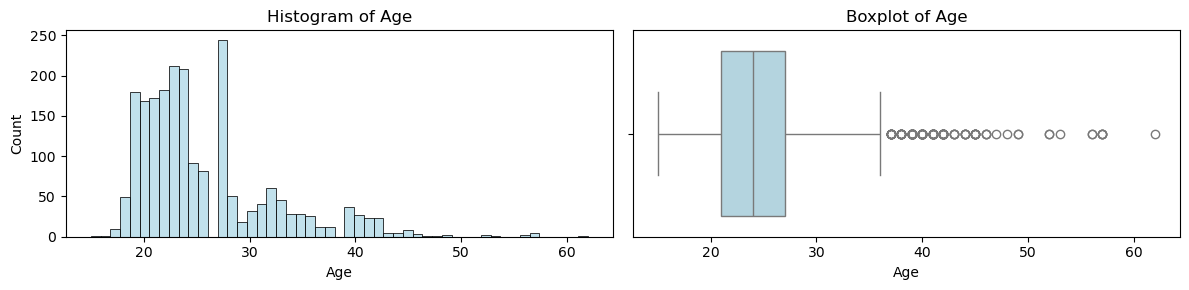

Age - Skewness: 1.5133935558436422
Age - Kurtosis: 2.736882363104849


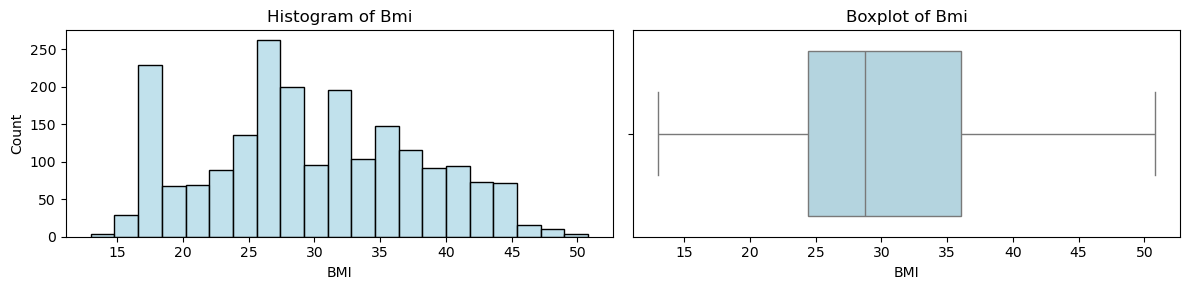

BMI - Skewness: 0.14229893658264958
BMI - Kurtosis: -0.8133317888622695


In [27]:
for i, var in enumerate(numerical_columns, 1):
    plt.figure(figsize=(12, 3))  
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], color= 'lightblue')  
    plt.title(f"Histogram of {var.capitalize()}")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color= 'lightblue')
    plt.title(f"Boxplot of {var.capitalize()}")
    plt.tight_layout()
    plt.show()
    print(f'{var} - Skewness: {df[var].skew()}')
    print(f'{var} - Kurtosis: {df[var].kurt()}')

In [28]:
for i in numerical_columns:
    print(i, shapiro(df[i]))

Age ShapiroResult(statistic=0.8651960470222763, pvalue=3.553467945819409e-39)
BMI ShapiroResult(statistic=0.9748082649853634, pvalue=9.146088567512204e-19)


From the result, the histogram for Age shows a skewed distribution, with most values concentrated between 20-30 years. From the skewness, kurtosis, Shapiro result, Age is not normally distributed, with a significant skew and presence of outliers.

Meanawhile, BMI dont have any outliers and the distribution are more symetric by the skewness and kurtosis result. BMI is approximately symmetric and shows no significant skew or outliers. However, the Shapiro-Wilk test indicates slight deviation from normality.

### Handling Outliers

In [ ]:
for var in numerical_columns:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"Number of outliers in {var}: {outliers.shape[0]}")
    if outliers.shape[0] > 0:
        distinct_outliers = outliers[var].unique().tolist()
        print(f"Distinct outlier values in {var}: {distinct_outliers}")
    print() 

Number of outliers in Age: 168
Distinct outlier values in Age: [42, 53, 40, 56, 39, 62, 45, 37, 41, 46, 52, 57, 38, 43, 44, 48, 49, 47]

Number of outliers in BMI: 0



Solution:
I decided to keep the outliers of Age because i will use Random Forest and XGBoost that are capable of handling outliers because they work by splitting data based on feature values and are not overly affected by extreme values. Also, the outliers in age are still tolerable considering those age are normal age.

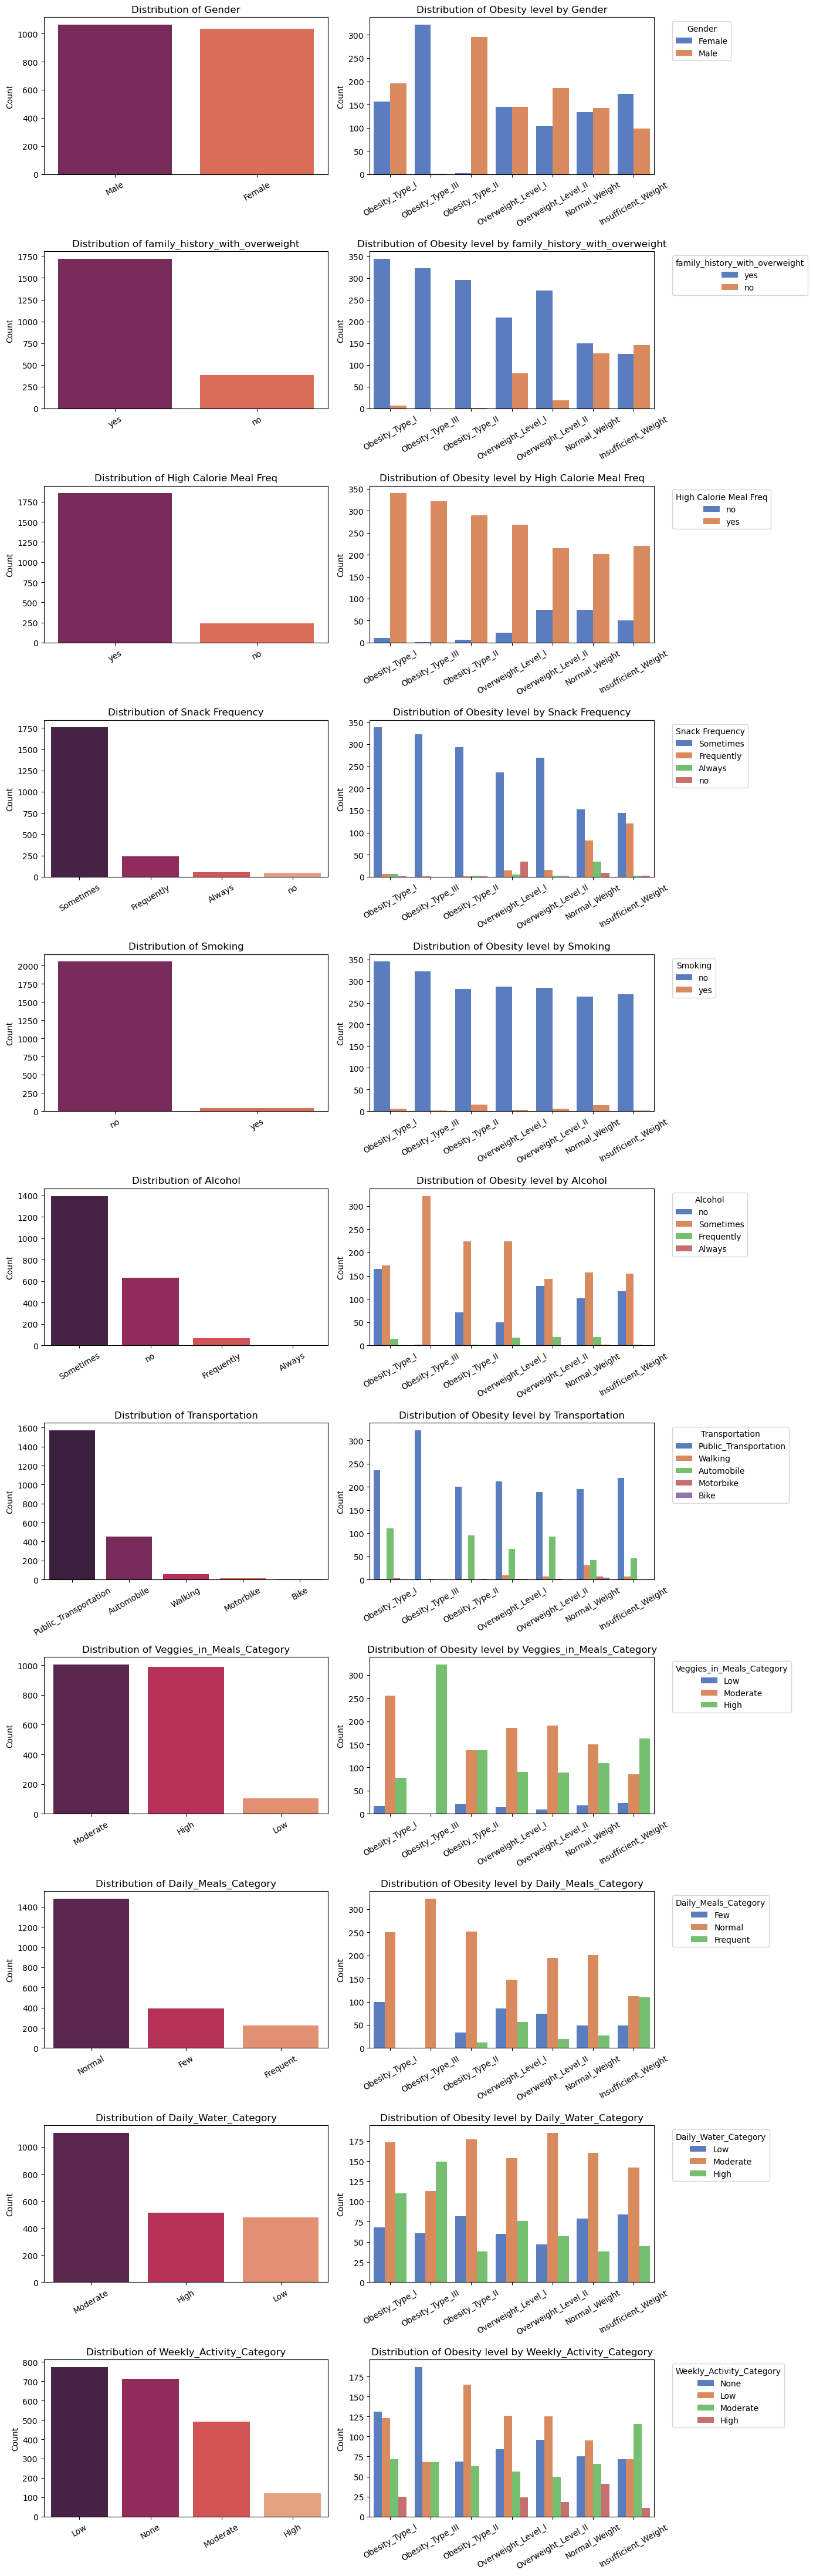

In [ ]:
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=2, figsize=(14, len(categorical_columns) * 4))
fig.tight_layout(pad=5)

for i, column in enumerate(categorical_columns):
    ax1 = axes[i, 0]
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, ax=ax1, palette="rocket")
    ax1.set_title(f"Distribution of {column}")
    ax1.set_xlabel("")
    ax1.set_ylabel("Count")
    ax1.tick_params(axis='x', rotation=30)

    ax2 = axes[i, 1]
    sns.countplot(data=df, x="Obesity level", hue=column, order=df["Obesity level"].value_counts().index, ax=ax2, palette="muted")
    ax2.set_title(f"Distribution of Obesity level by {column}")
    ax2.set_xlabel("")
    ax2.set_ylabel("Count")
    ax2.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


### Insight


- The gender distribution is balanced between male and females. But, by obesity level, it shows that Obesity type 1 are dominant by female, and obesity type 2 are dominant by male. Because of the diffrence dominant gender in obesity level it may be an important feature.
- From the distribution, majority on the dataset has a family history of overweight. From the plot by obesity level, large majority individual are more likely to fall under obesity type 1,2,3. The influce of genetic factor of obesity are significantly contribute to obesity level. While the one with no history, most of the are consicer insufficient in weight.
- Most of the data are distributed on 'Sometimes'. But, the data of people who choose 'no' has occur more on obesity type 2 than other obesity segment.
- Most individuals do not smoke. Smoking shows minimal variation across obesity levels, suggesting it might not have a strong impact on predicting obesity.
- Most data on alcohol consumtion are 'sometimes'. Only 1 data show it always. Individual 'frequently' and 'sometimes' are more likely to overweight.
Public transportation is the most common. Individuals relying on walking or bicycles are more likely to have normal or insufficient weight, whereas those using automobiles or public transportation are more prone to obesity.Transportation type may an important feature, indicating lifestyle and activity levels.
- Most individuals have a "moderate" or "high" intake of vegetables. It doesnt show that low consumption of veggies are overweight, meanawhile high consumption of veggies are dominan on obesity type 3.
- Most of the daily meals individual are normal. Yet 'normal' itself are more distributed on obesity rather than normal. Meanawhile, the one with 'frequent' daily meal are more insufficient weight. Meanawhile, obesity type 1 only have individual with 'normal' daily meals
- Most individuals have "moderate" water consumption. Most of the indiviual that has high consumption of water are on obesity type 3.
- Most individuals report "low" or "none" for weekly physical activity. Higher activity levels ("moderate" or "high") are associated with lower obesity levels or normal weight.

# Data Preprocessing

## Encoding

## Label Encoding

In [31]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'no': 0, 'yes': 1})
df['High Calorie Meal Freq'] = df['High Calorie Meal Freq'].map({'no': 0, 'yes': 1})
df['Snack Frequency'] = df['Snack Frequency'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3})
df['Smoking'] = df['Smoking'].map({'no': 0, 'yes': 1})
df['Alcohol'] = df['Alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2,'Always': 3})
df['Transportation'] = df['Transportation'].map({'Automobile':4, 'Bike': 1, 'Motorbike':3, 'Public_Transportation':2, 'Walking': 0})
df['Veggies_in_Meals_Category'] = df['Veggies_in_Meals_Category'].map({'High':2, 'Low':0, 'Moderate':1})
df['Daily_Meals_Category'] = df['Daily_Meals_Category'].map({'Few':0, 'Frequent':2, 'Normal':1})
df['Daily_Water_Category'] = df['Daily_Water_Category'].map({'High':2, 'Low':0, 'Moderate':1})
df['Weekly_Activity_Category'] = df['Weekly_Activity_Category'].map({'High':3, 'Low':1, 'Moderate':2,'None': 0})

# Modelling

## Random Forest

### Split Dataset

In [32]:
x = df.drop(columns=['Obesity level'])
y = df['Obesity level'].map({'Insufficient_Weight':0,'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size= 0.2, random_state= 42)

### Scaling

I decided to not to normalize / scale the data because the model we used both RandomForest based on tree algorithm. Decision trees split data based on feature thresholds, and these thresholds are not affected by the scale of the data.

In [33]:
rf= RandomForestClassifier(random_state = 42)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

### Define Hyperparameter & Seach Space

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300,500],         
    'max_depth': [None, 10,50, 70, 100],         
    'min_samples_split': [2, 5, 10, 20],              
    'min_samples_leaf': [1, 2, 4, 8],                 
    'max_features': ['sqrt', 'log2', None, 0.5]      
}

grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=5,                      
    scoring='f1',        
    n_jobs=-1,                 
    verbose=2
)

grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 50, 70, 100],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='f1', verbose=2)

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
ytest_pred = best_rf.predict(xtest)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## XGBoost

### Split Dataset

In [36]:
x_xgb = df.drop(columns=['Obesity level'])
y_xgb = df['Obesity level'].map({'Insufficient_Weight':0,'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})

In [37]:
xtrain_xgb, xtest_xgb, ytrain_xgb,ytest_xgb = train_test_split(x_xgb,y_xgb,test_size= 0.2, random_state= 42)

### Scaling

XGBoost also builds trees by optimizing split criteria (e.g., information gain), which are scale-independent. Also, the dataset doesn't contain features with extreme scales.

In [ ]:
xgbCls = xgb.XGBClassifier(enable_categorical=True)
xgbCls.fit(xtrain_xgb,ytrain_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
ypred_xgb = xgbCls.predict(xtest_xgb)

### Fine Tuning

In [ ]:
param_grid_xgb= {
    'n_estimators': [100, 200, 500],        
    'max_depth': [3, 5, 10],               
    'learning_rate': [0.01, 0.1, 0.2],     
    'subsample': [0.6, 0.8, 1.0],          
    'colsample_bytree': [0.6, 0.8, 1.0],   
    'gamma': [0, 1, 5],                    
    'reg_alpha': [0, 0.1, 1],              
    'reg_lambda': [1, 10, 100]             
}

grid_search_xgb = GridSearchCV(
    estimator=xgbCls, 
    param_grid=param_grid, 
    cv=5,                     
    scoring='f1',             
    n_jobs=-1,                
    verbose=2
)

grid_search_xgb.fit(xtrain_xgb, ytrain_xgb)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 50, 70, 100],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='f1', verbose=2)

In [ ]:
print("Best Hyperparameters:", grid_search_xgb.best_params_)
best_xgb = grid_search_xgb.best_estimator_
ytest_pred_xgb = best_xgb.predict(xtest_xgb)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


# Evaluation

In [ ]:
classes = [0, 1, 2, 3, 4, 5, 6]
ytest_binarized = label_binarize(ytest, classes=classes)
ytest_pred_proba_rf = best_rf.predict_proba(xtest)
ytest_pred_proba_xgb = best_xgb.predict_proba(xtest_xgb)


roc_auc_rf = roc_auc_score(ytest_binarized, ytest_pred_proba_rf, average="macro", multi_class="ovr")
print("ROC AUC for Random Forest:", roc_auc_rf)
roc_auc_xgb = roc_auc_score(ytest_binarized, ytest_pred_proba_xgb, average="macro", multi_class="ovr")
print("ROC AUC for XGBoost:", roc_auc_xgb)

ROC AUC for Random Forest: 0.9994751778960251
ROC AUC for XGBoost: 0.9957168746274225


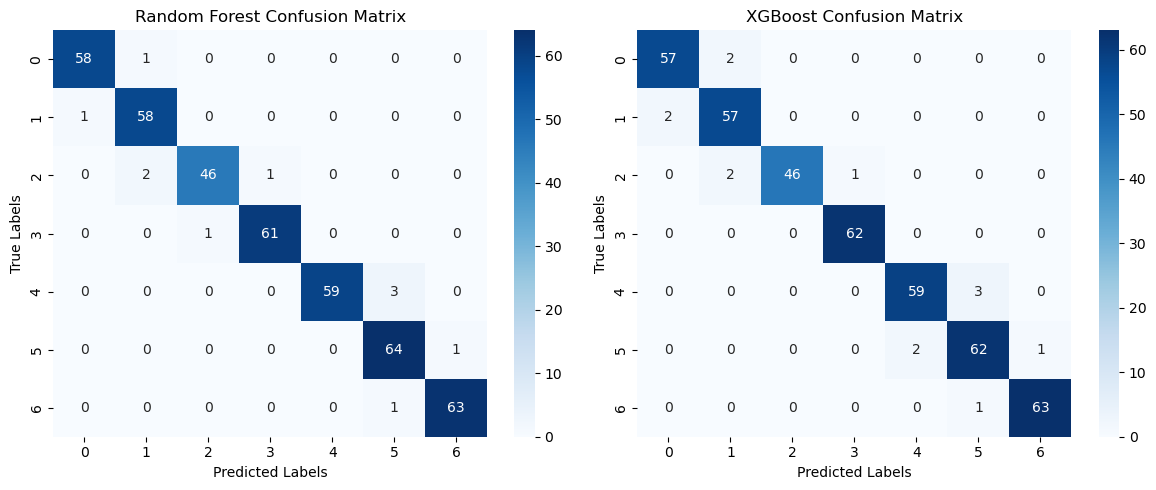

In [ ]:
# Confusion Matrix fpr Rf
conf_matrix = confusion_matrix(ytest, ytest_pred)
conf_matrix_xgb = confusion_matrix(ytest_xgb, ytest_pred_xgb)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Plot Confusion Matrix for XGBoost
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('XGBoost Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

In [ ]:
print('Random Forest:\n')
class_report = classification_report(ytest, ytest_pred, target_names=[str(cls) for cls in best_rf.classes_])
print(class_report)

print('\nXGBoost:\n')
class_report_xgb = classification_report(ytest_xgb, ytest_pred_xgb, target_names=[str(cls) for cls in best_rf.classes_])
print(class_report_xgb)

Random Forest:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.95      0.98      0.97        59
           2       0.98      0.94      0.96        49
           3       0.98      0.98      0.98        62
           4       1.00      0.95      0.98        62
           5       0.94      0.98      0.96        65
           6       0.98      0.98      0.98        64

    accuracy                           0.97       420
   macro avg       0.97      0.97      0.97       420
weighted avg       0.97      0.97      0.97       420


XGBoost:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.93      0.97      0.95        59
           2       1.00      0.94      0.97        49
           3       0.98      1.00      0.99        62
           4       0.97      0.95      0.96        62
           5       0.94      0.95      0.95        

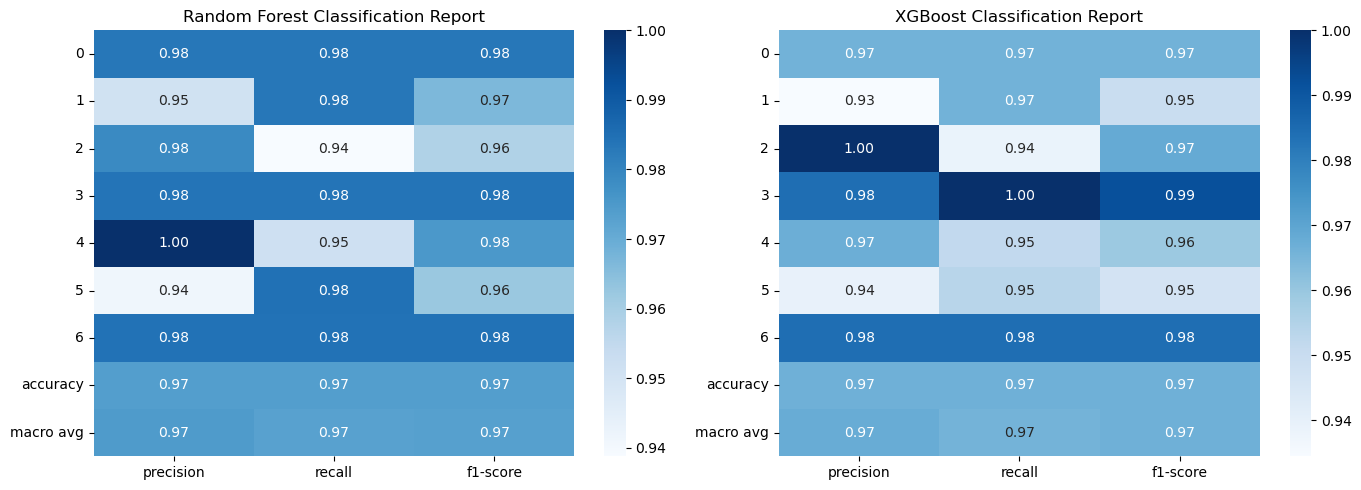

In [ ]:
def classification_report_to_df(y_true, y_pred, target_names):
    report_dict = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    df = pd.DataFrame(report_dict).transpose()
    return df

rf_report_df = classification_report_to_df(ytest, ytest_pred, target_names=[str(cls) for cls in best_rf.classes_])
xgb_report_df = classification_report_to_df(ytest_xgb, ytest_pred_xgb, target_names=[str(cls) for cls in best_rf.classes_])

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(rf_report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Classification Report')

sns.heatmap(xgb_report_df.iloc[:-1, :-1], annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('XGBoost Classification Report')

plt.tight_layout()
plt.show()

On the ROC AUC result, both performing very well. Both model has become excellent at classifying samples across all classes with minimal overlap in predicted probabilities, which is why its ROC AUC is so high.The ROC AUC for XGBoost (0.9957) is strong, but it is slightly lower than Random Forest’s score(0.9994). This suggests that while XGBoost is also performing excellently in terms of class discrimination, it is not outperforming Random Forest in this case.

On the Confussion matrix, Both model are diagonally dominant where both models have high counts along the diagonal, showing most predictions align with the true labels. This reflects excellent classification ability.
- Random Forest & XGBoost
    - Both model has the most misclassified column on the second and fourth column (Normal_Weight)

Even though random forest is better at classified the sixth column and XGBoost at fourth column. I indicate those three column (Normal_Weight, Obesity_Type_II, Overweight_Level_I) need further analysis on our classification report.

Both models struggle to classify individuals in the Normal_Weight category correctly, with the second column consistently being a source of misclassification.

Normal weight misclassified as not normal (e.g., Insufficient Weight or Overweight) can lead to:
- Unnecessary interventions: Individuals might undergo treatment or dietary changes when they are actually healthy.
- Psychological impact: Labeling someone incorrectly can lead to stress or stigma, especially if labeled as overweight.
Conversely, failing to identify someone as normal weight (e.g., predicting overweight instead) might mask underlying issues.


On the classification report, both models show consistently high precision and recall across most categories, indicating they rarely misclassify instances or miss predictions for any obesity level. Expecially on Obesity type I both model has precision of 100%. Meanawhile, on recall, XGBoost has 100% recall on Obesity Type II.
- Random Forest:
    - Demonstrates higher precision and recall across almost all categories.
    - A near-perfect balance between precision and recall in critical categories suggests better robustness in clinical application.
- XGBoost:
    - Slightly underperforms for categories like Normal Weight (f1-score: 95%) and Overweight_Level_I (f1-score: 95%).
    - Higher f1-score for critical class like Obesity Type II(f1-score: 99%).


Both models have macro and weighted averages of around 97%, indicating their performance is balanced across all classes, regardless of class size. In summary, Random Forest slightly outperform XGBoost because the only features XGBoost slightly outperform Random Forest on F1-Score is on Obesity Type II. On everything else, RandomForest outperform XGBoost.

`Conclussion`, Both models are excellent tools for predicting obesity levels, with Random Forest slightly edging out XGBoost in all evaluattion metric. Both Random Forest and XGBoost are highly suitable for predicting obesity levels with great accuracy, and either model can be deployed confidently in practical applications. If value explainability and slightly better overall performance, Random Forest may be the better choice.

Last, both models serve as excellent tools for helping healthcare professionals and researchers assess obesity and understand the key factors contributing to an individual's weight status, which can lead to more personalized healthcare interventions.


# Feature Importance Based on the Best Model (Random Forest)

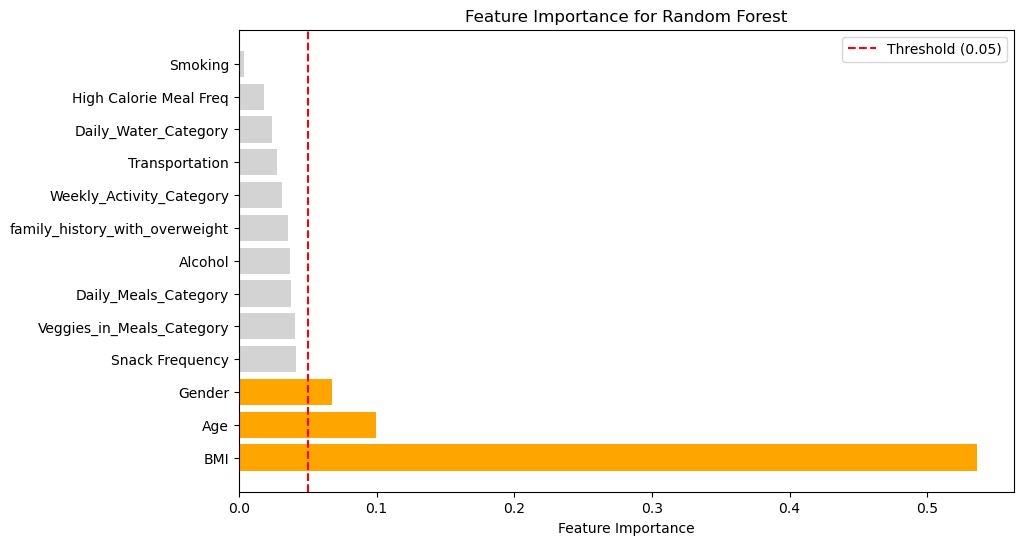

Important Features: ['BMI', 'Age', 'Gender']


In [ ]:
importances = best_rf.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
colors = np.where(feature_importance_df['Importance'] > 0.05, 'orange', 'lightgray')
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.axvline(x=0.05, color='red', linestyle='--', label="Threshold (0.05)")
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.legend()
plt.show()

selected_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]

selected_feature_names = selected_features['Feature'].tolist()
print(f'Important Features: {selected_feature_names}')

## Insight

On this case, i used embeded methods to choose the feature importance of my best model Random Forest.Embedded methods perform feature selection as part of the model training. When a decision tree model (like Random Forest or XGBoost) is trained, the model calculates the importance of each feature automatically. I also use 0.05 as the threshold because it's a common starting point to identify features that have a significant contribution compared to others.

BMI emerges as the most critical feature, with a significantly higher importance score than the rest, exceeding 0.5. This suggests that body mass index plays a dominant role in the model's predictions, indicating its strong correlation with the target variable.

Age is the second most influential feature,  with a much smaller importance score compared to BMI. It highlights the relevance of an individual’s age in the context of the predictions.

Gender holds some predictive power but is considerably less important than BMI and Age, yet it surpasses the defined threshold of 0.05, making it a relevant feature in the model.

All other features, including lifestyle factors like Snack Frequency, Veggies in Meals, and High Calorie Meal Frequency, along with health-related variables such as family history with overweight and Alcohol, fall below the 0.05 threshold. These features are relatively insignificant for this model, suggesting they contribute minimally to the predictive power. Especially smoking as the lowest importance of all the other features.